In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.patches import Rectangle
from scipy.stats import relfreq

from matplotlib.ticker import FormatStrFormatter

sns.set(context='poster', style='white')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'arial'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df_tracks = pd.read_csv('../data/billboard-lyrics-spotify.csv')
df_tracks.head()

artist_all          artist_base  rank                       song  \
0          percy faith          percy faith     1  theme from a summer place   
1           jim reeves           jim reeves     2           he'll have to go   
2  the everly brothers  the everly brothers     3              cathy's clown   
3       johnny preston       johnny preston     4               running bear   
4         mark dinning         mark dinning     5                 teen angel   

   year artist_featured                 song_clean         artist_clean  \
0  1960             NaN  theme from a summer place          percy faith   
1  1960             NaN            hell have to go           jim reeves   
2  1960             NaN               cathys clown  the everly brothers   
3  1960             NaN               running bear       johnny preston   
4  1960             NaN                 teen angel         mark dinning   

                                              lyrics  danceability  ...  \
0  theres a summer place where it may rain or sto...         0.213  ...   
1  put your sweet lips a little closer to the pho...         0.429  ...   
2   dont want your love any more dont want your k...         0.499  ...   
3  on the bank of the river stood running bear yo...         0.772  ...   
4  teen angel teen angel teen angel that fateful ...         0.569  ...   

     tempo  time_signature  popularity  explicit  duration_min  num_words  \
0  181.746             3.0        54.0     False      2.753567      104.0   
1   79.076             3.0        51.0     False      2.373783      152.0   
2  120.240             4.0        25.0     False      2.429117      121.0   
3  119.987             4.0        25.0     False      2.636667      220.0   
4  101.521             4.0        26.0     False      2.664883      109.0   

   words_per_sec  num_uniq_words  decade  uniq_ratio  
0       0.629487            58.0    1960    0.557692  
1       1.067213            69.0    1960    0.453947  
2       0.830206            64.0    1960    0.528926  
3       1.390645            89.0    1960    0.404545  
4       0.681706            73.0    1960    0.669725  

[5 rows x 29 columns]

In [3]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_all        6301 non-null   object 
 1   artist_base       6301 non-null   object 
 2   rank              6301 non-null   int64  
 3   song              6301 non-null   object 
 4   year              6301 non-null   int64  
 5   artist_featured   734 non-null    object 
 6   song_clean        6301 non-null   object 
 7   artist_clean      6301 non-null   object 
 8   lyrics            6250 non-null   object 
 9   danceability      6153 non-null   float64
 10  energy            6153 non-null   float64
 11  key               6153 non-null   float64
 12  loudness          6153 non-null   float64
 13  mode              6153 non-null   float64
 14  speechiness       6153 non-null   float64
 15  acousticness      6153 non-null   float64
 16  instrumentalness  6153 non-null   float64


In [ ]:
df_tracks.describe().transpose()

In [ ]:
df_tracks

In [ ]:
pd.isnull(df_tracks).sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\2006439017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcoords[columns] = df_parcoords[columns].apply(zero_one_scaler, axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\2006439017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcoords['year'] = df_nonnull['year']


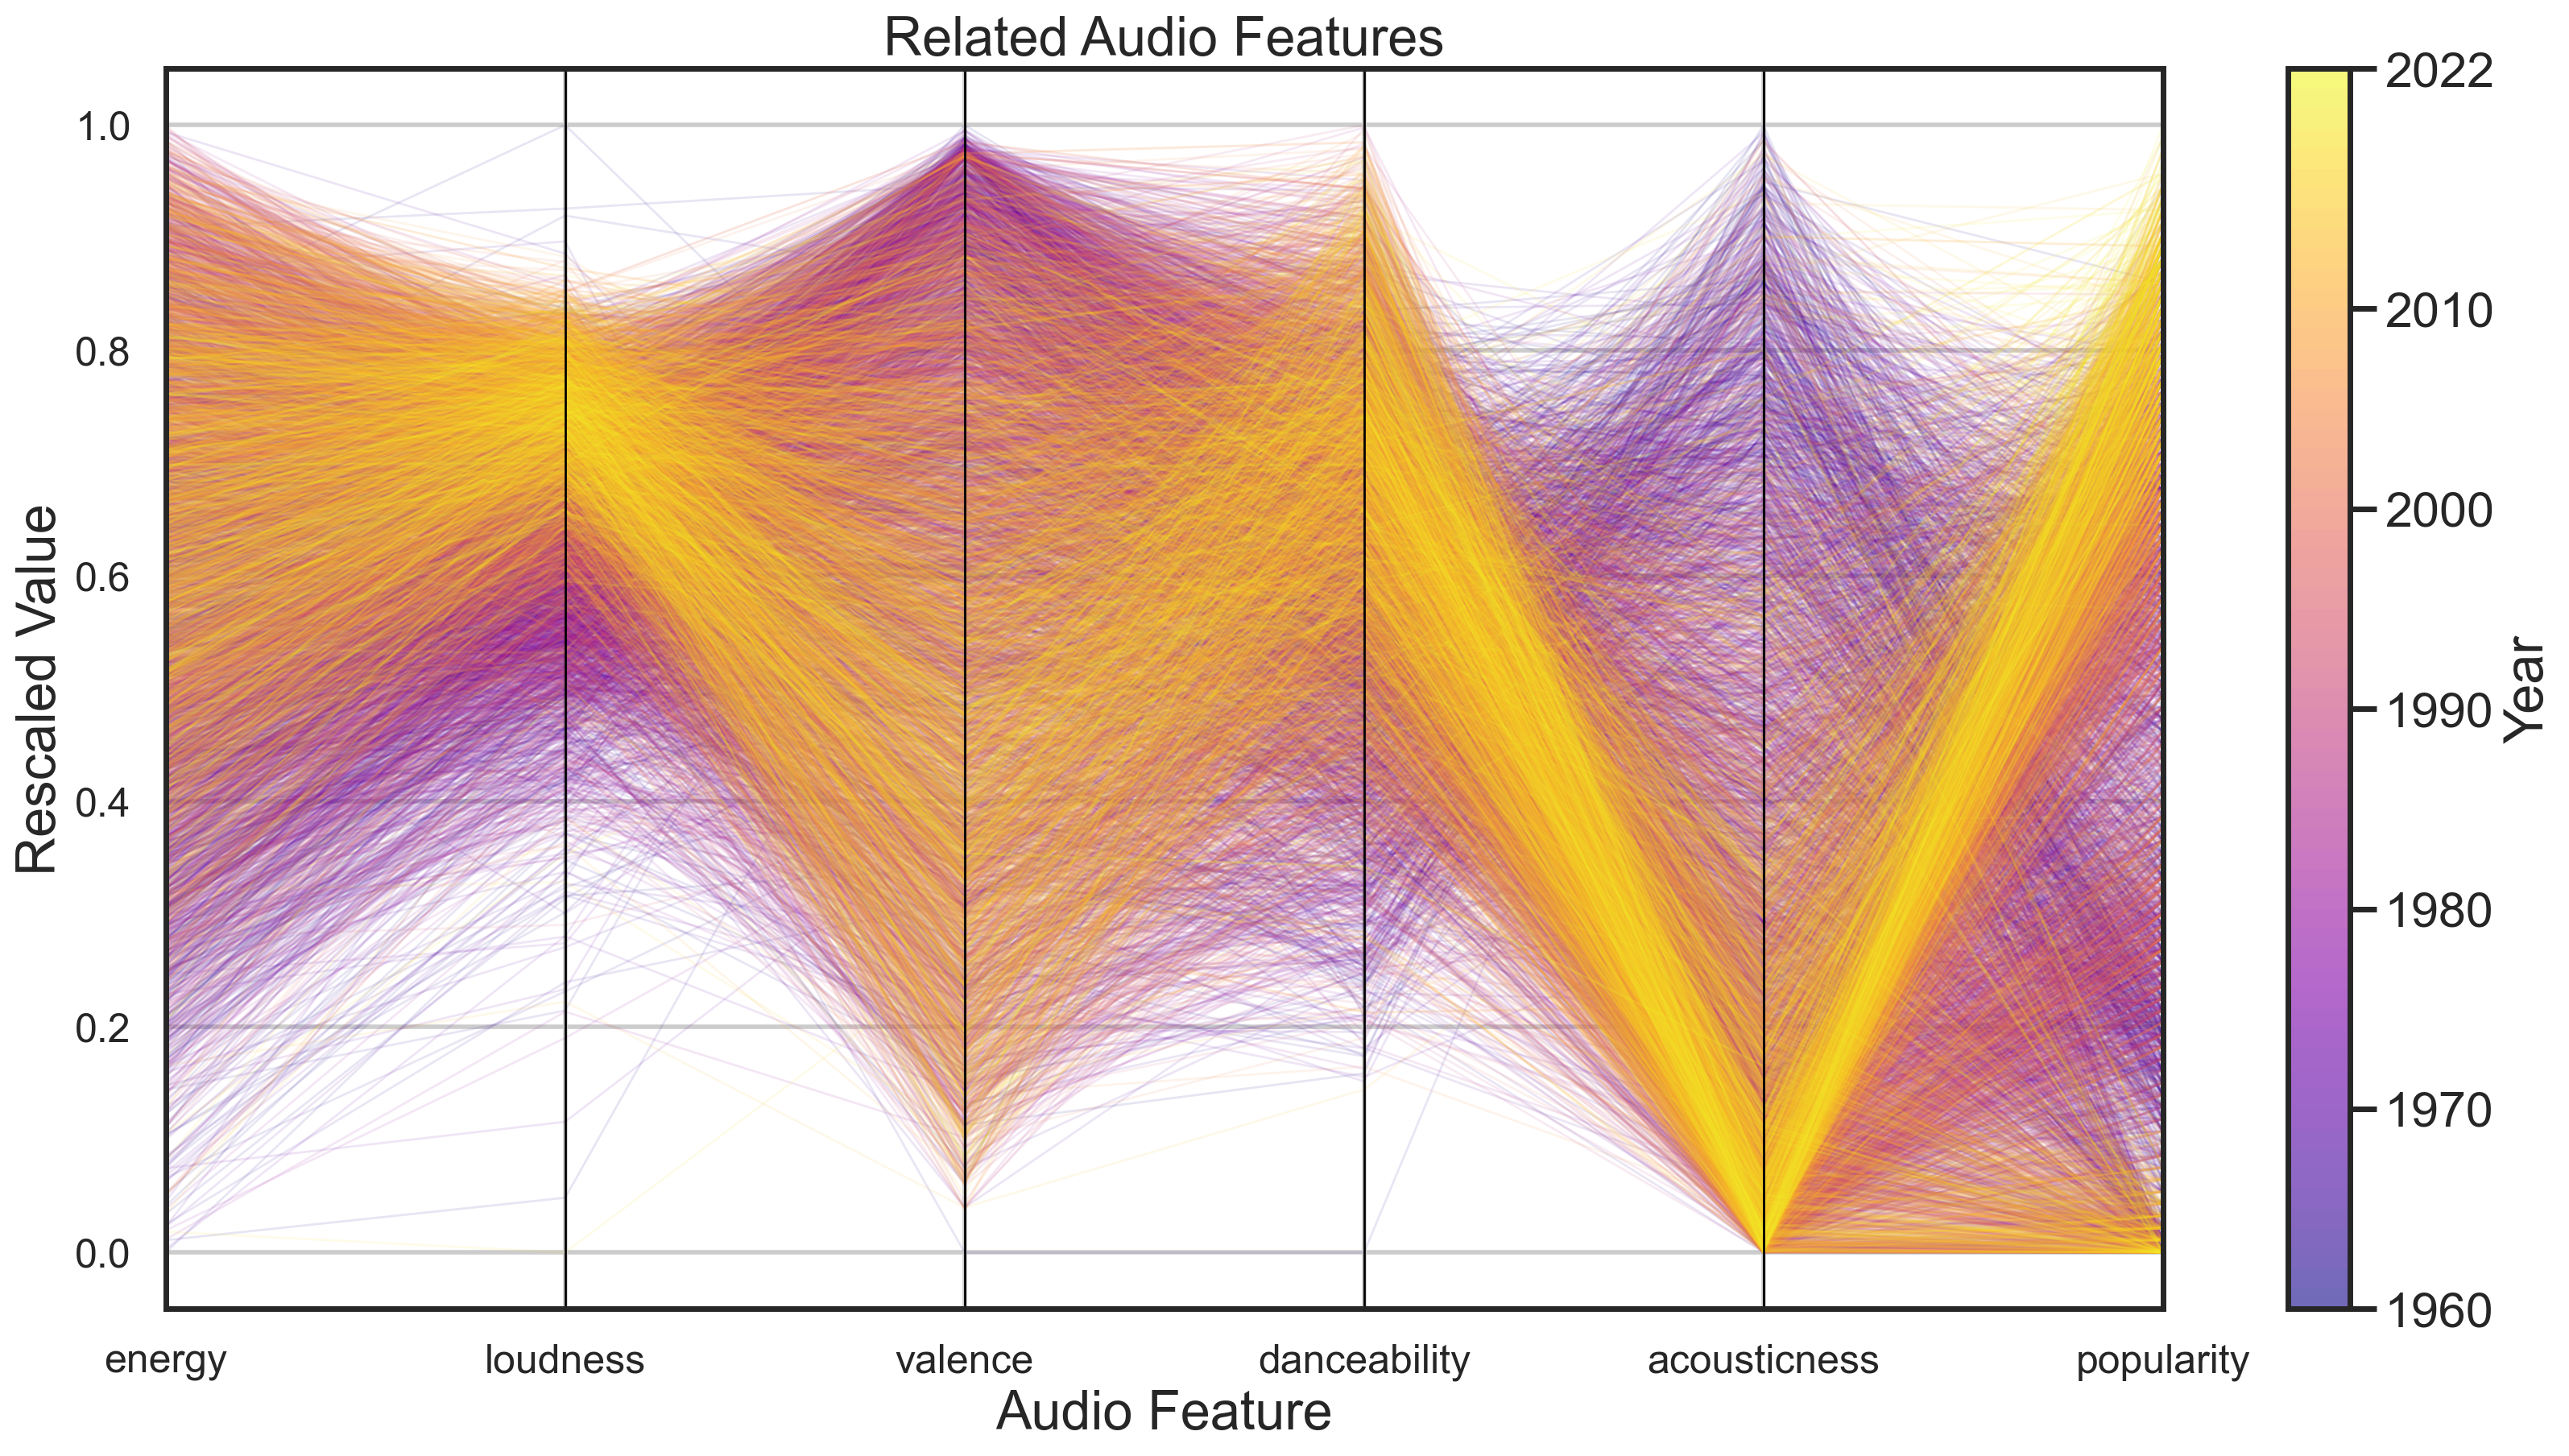

In [183]:
def zero_one_scaler(x):
    return (x - x.min()) / np.ptp(x)

# filter for only songs with audio feature data
df_nonnull = df_tracks[df_tracks['popularity'].notnull()]
columns = ['energy', 'loudness', 'valence', 'danceability','acousticness',
           'popularity']

# scale all features to be between 0 and 1, then add 'year' as unscaled column
df_parcoords = df_nonnull[columns]
df_parcoords[columns] = df_parcoords[columns].apply(zero_one_scaler, axis=0)
df_parcoords['year'] = df_nonnull['year']

# df_parcoords

# # make parallel coordinate plot
plt.figure(figsize=(20,10))
cmap_name = 'plasma'
# cmap = plt.cm.get_cmap('inferno')
# cmap = plt.cm.get_cmap(cmap_name)
cmap = mpl.colormaps[cmap_name]
colors = [cmap(x) for x in np.linspace(0, 1, 64)]
ax = pd.plotting.parallel_coordinates(df_parcoords, 'year', columns,
                                      alpha=0.1, linewidth=1, color=colors)

# replace legend with custom colorbar
ax.legend([]).remove()
norm = mpl.colors.Normalize(vmin=1960,vmax=2022)
sm = plt.cm.ScalarMappable(cmap=cmap_name, norm=norm)
sm.set_array(colors)
cb = plt.colorbar(sm, cmap=cmap, ax=ax, 
                #   ticks=np.arange(1922, 2022, 10),
                  ticks=np.append(np.arange(1960, 2019, 10), 2022),
                  boundaries=np.arange(1960, 2023), 
                  alpha=0.6
                  )
cb.set_label('Year')

ax.set(xlabel='Audio Feature', ylabel='Rescaled Value',
       title='Related Audio Features')
plt.tick_params(axis='both', which='major', labelsize=18)

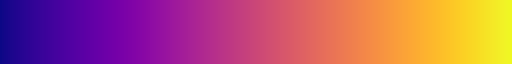

In [142]:
cmap = mpl.colormaps[cmap_name]
cmap